In [13]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import os
import json
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = os.getenv("DataAcct_consumer_key")
consumer_secret = os.getenv("DataAcct_consumer_secret")
access_token = os.getenv("DataAcct_access_token")
access_token_secret = os.getenv("DataAcct_access_token_secret")

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [33]:
# Target Account
target_users = ["@bbc","@CBS","@FOX","@CNN","@nytimes"]


In [71]:
  # Variables for holding sentiments
sentiments = []
for target_user in target_users:
    # Counter
    counter = 1

  
    
    print(target_user)

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user,page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
#             print("Tweet %s: %s" % (counter, tweet["text"]))
#             print(json.dumps(tweet,indent=4))
#             print(tweet["user"]["screen_name"])
        
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
        
            # Add sentiments for each tweet into an array
            sentiments.append({"source" : tweet["user"]["screen_name"],
                                "DateHapp": datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"), 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
            # Add to counter 
            counter = counter + 1

@bbc
@CBS
@FOX
@CNN
@nytimes


In [76]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd.sort_values(by=['DateHapp'],ascending=False)
# sentiments_pd["source"].unique()
sentiments_pd

,Compound,DateHapp,Negative,Neutral,Positive,Tweets Ago,source
420,-0.4215,2017-11-27 00:01:53+00:00,0.763,0.237,0.000,21,nytimes
400,-0.4215,2017-11-27 00:01:53+00:00,0.763,0.237,0.000,1,nytimes
300,0.3400,2017-11-27 00:00:06+00:00,0.888,0.000,0.112,1,CNN
320,0.3400,2017-11-27 00:00:06+00:00,0.888,0.000,0.112,21,CNN
421,0.2500,2017-11-26 23:57:56+00:00,0.900,0.000,0.100,22,nytimes
401,0.2500,2017-11-26 23:57:56+00:00,0.900,0.000,0.100,2,nytimes
220,0.2500,2017-11-26 23:48:31+00:00,0.926,0.000,0.074,21,fox
200,0.2500,2017-11-26 23:48:31+00:00,0.926,0.000,0.074,1,fox
422,0.7964,2017-11-26 23:42:31+00:00,0.717,0.000,0.283,23,nytimes
402,0.7964,2017-11-26 23:42:31+00:00,0.717,0.000,0.283,3,nytimes


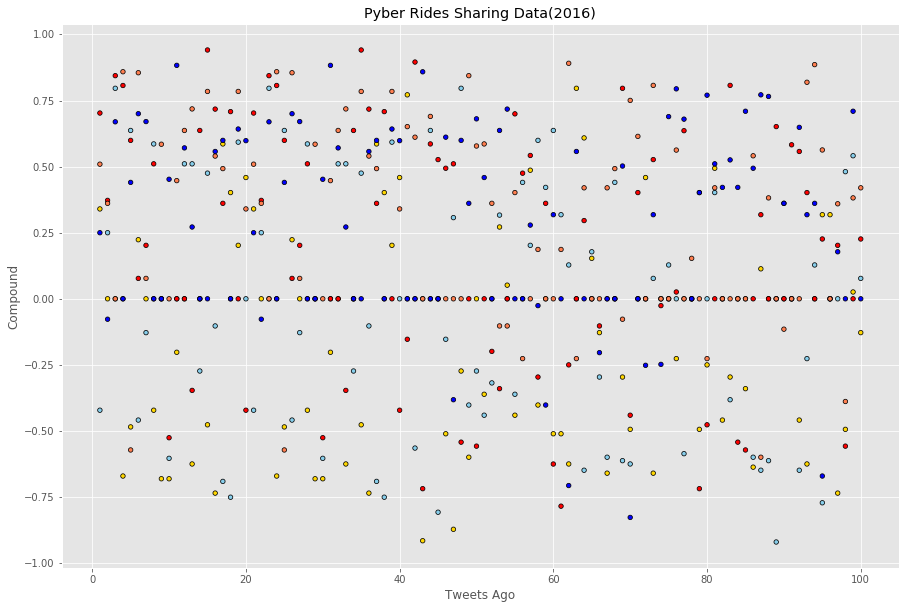

In [73]:
"#display scatter plot using new data frame\n",
#     "plt.style.use('ggplot')\n",
clr = {'CNN' : 'Gold','nytimes' : 'SkyBlue','CBS' : 'coral','fox' : 'blue','BBC' : 'red'}
sentiments_pd.plot(kind="scatter",x='Tweets Ago',y="Compound",title="Pyber Rides Sharing Data(2016)",
                   edgecolors='black',c=sentiments_pd["source"].map(clr),figsize=(15,10),alpha=1,linewidth=0.75)
                   
                   
                       
    
#     "plt.xlim(0, df_city_stats[\"Total Number of Rides(Per City)\"].max()+5)\n",
#     "plt.ylim(df_city_stats[\"Average Fare($)\"].min()-5, df_city_stats[\"Average Fare($)\"].max()+5)\n",
plt.show()